In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("Glass Identification.csv")

In [3]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.to_csv("Glass Identification.csv",header=["Id number","RI","Na"," Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"],index=False)

In [5]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
df.shape

(214, 11)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3    Mg            214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [9]:
df.isnull().sum()

Id number        0
RI               0
Na               0
 Mg              0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [10]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
df["Type of glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

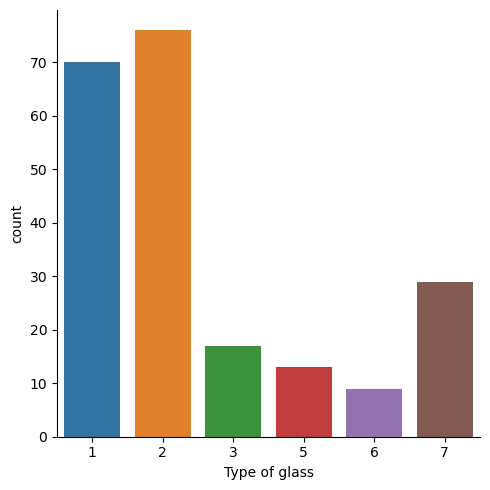

In [12]:
sns.catplot(x='Type of glass',data=df,kind='count')

<Axes: xlabel='Type of glass', ylabel='RI'>

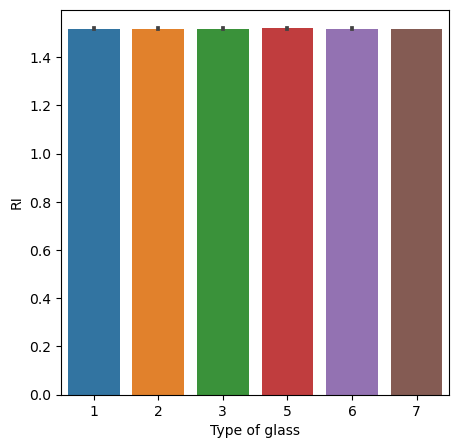

In [13]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='RI',data=df)

In [14]:
df["RI"].value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64

<Axes: xlabel='Type of glass', ylabel='Na'>

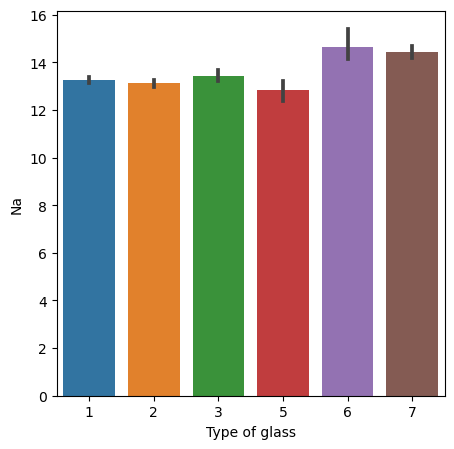

In [15]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='Na',data=df)

<Axes: xlabel='Type of glass', ylabel=' Mg'>

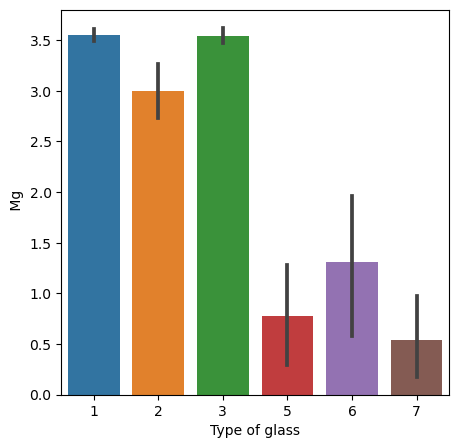

In [16]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y=' Mg',data=df)

<Axes: xlabel='Type of glass', ylabel='Al'>

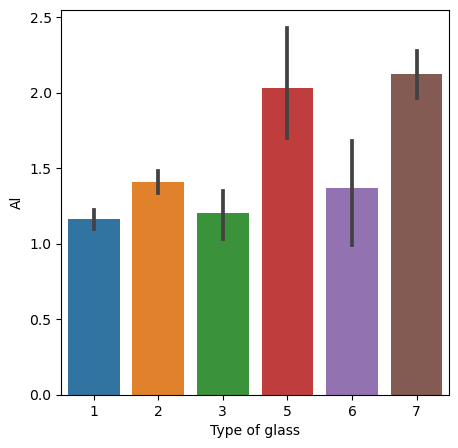

In [17]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='Al',data=df)

<Axes: xlabel='Type of glass', ylabel='Si'>

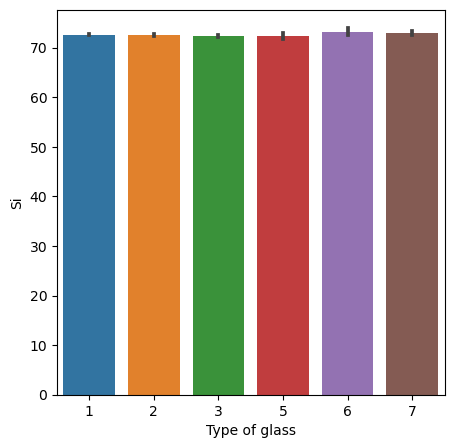

In [18]:
lot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='Si',data=df)

In [19]:
df["Si"].value_counts()

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64

<Axes: xlabel='Type of glass', ylabel='K'>

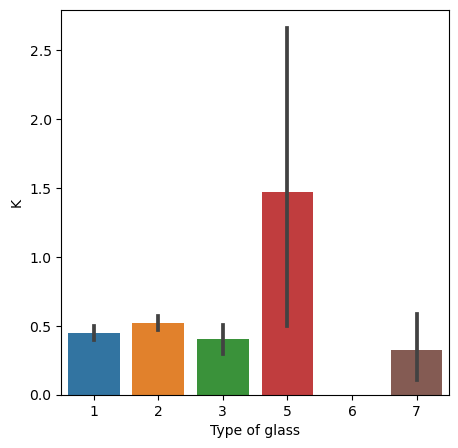

In [20]:
lot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='K',data=df)

<Axes: xlabel='Type of glass', ylabel='Ca'>

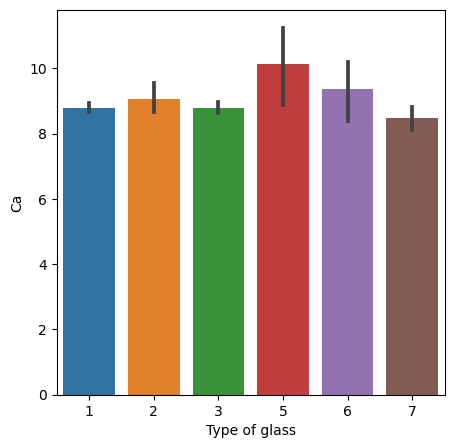

In [21]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='Ca',data=df)

<Axes: xlabel='Type of glass', ylabel='Ba'>

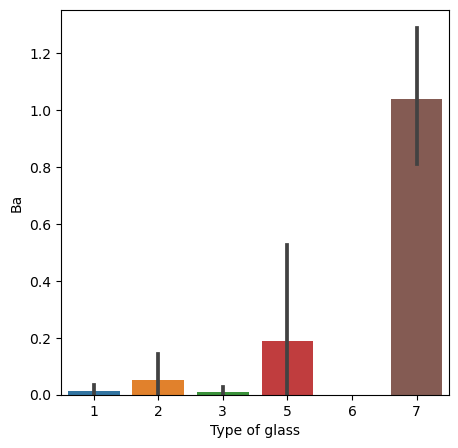

In [22]:
lot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='Ba',data=df)

<Axes: xlabel='Type of glass', ylabel='Fe'>

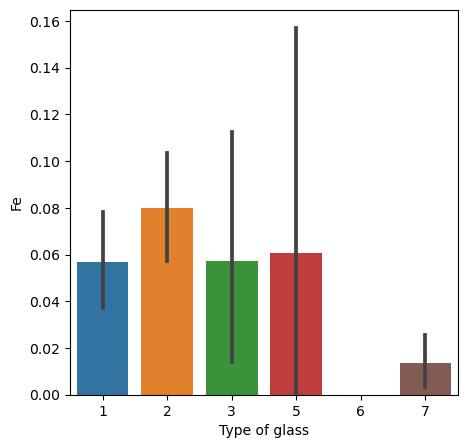

In [23]:
lot=plt.figure(figsize=(5,5))
sns.barplot(x='Type of glass',y='Fe',data=df)

In [24]:
df.corr()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<Axes: >

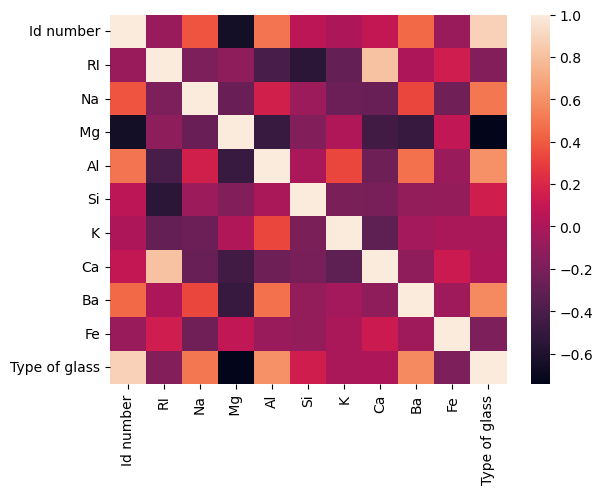

In [25]:
sns.heatmap(df.corr())

In [26]:
df.skew()

Id number        0.000000
RI               1.625431
Na               0.454181
 Mg             -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

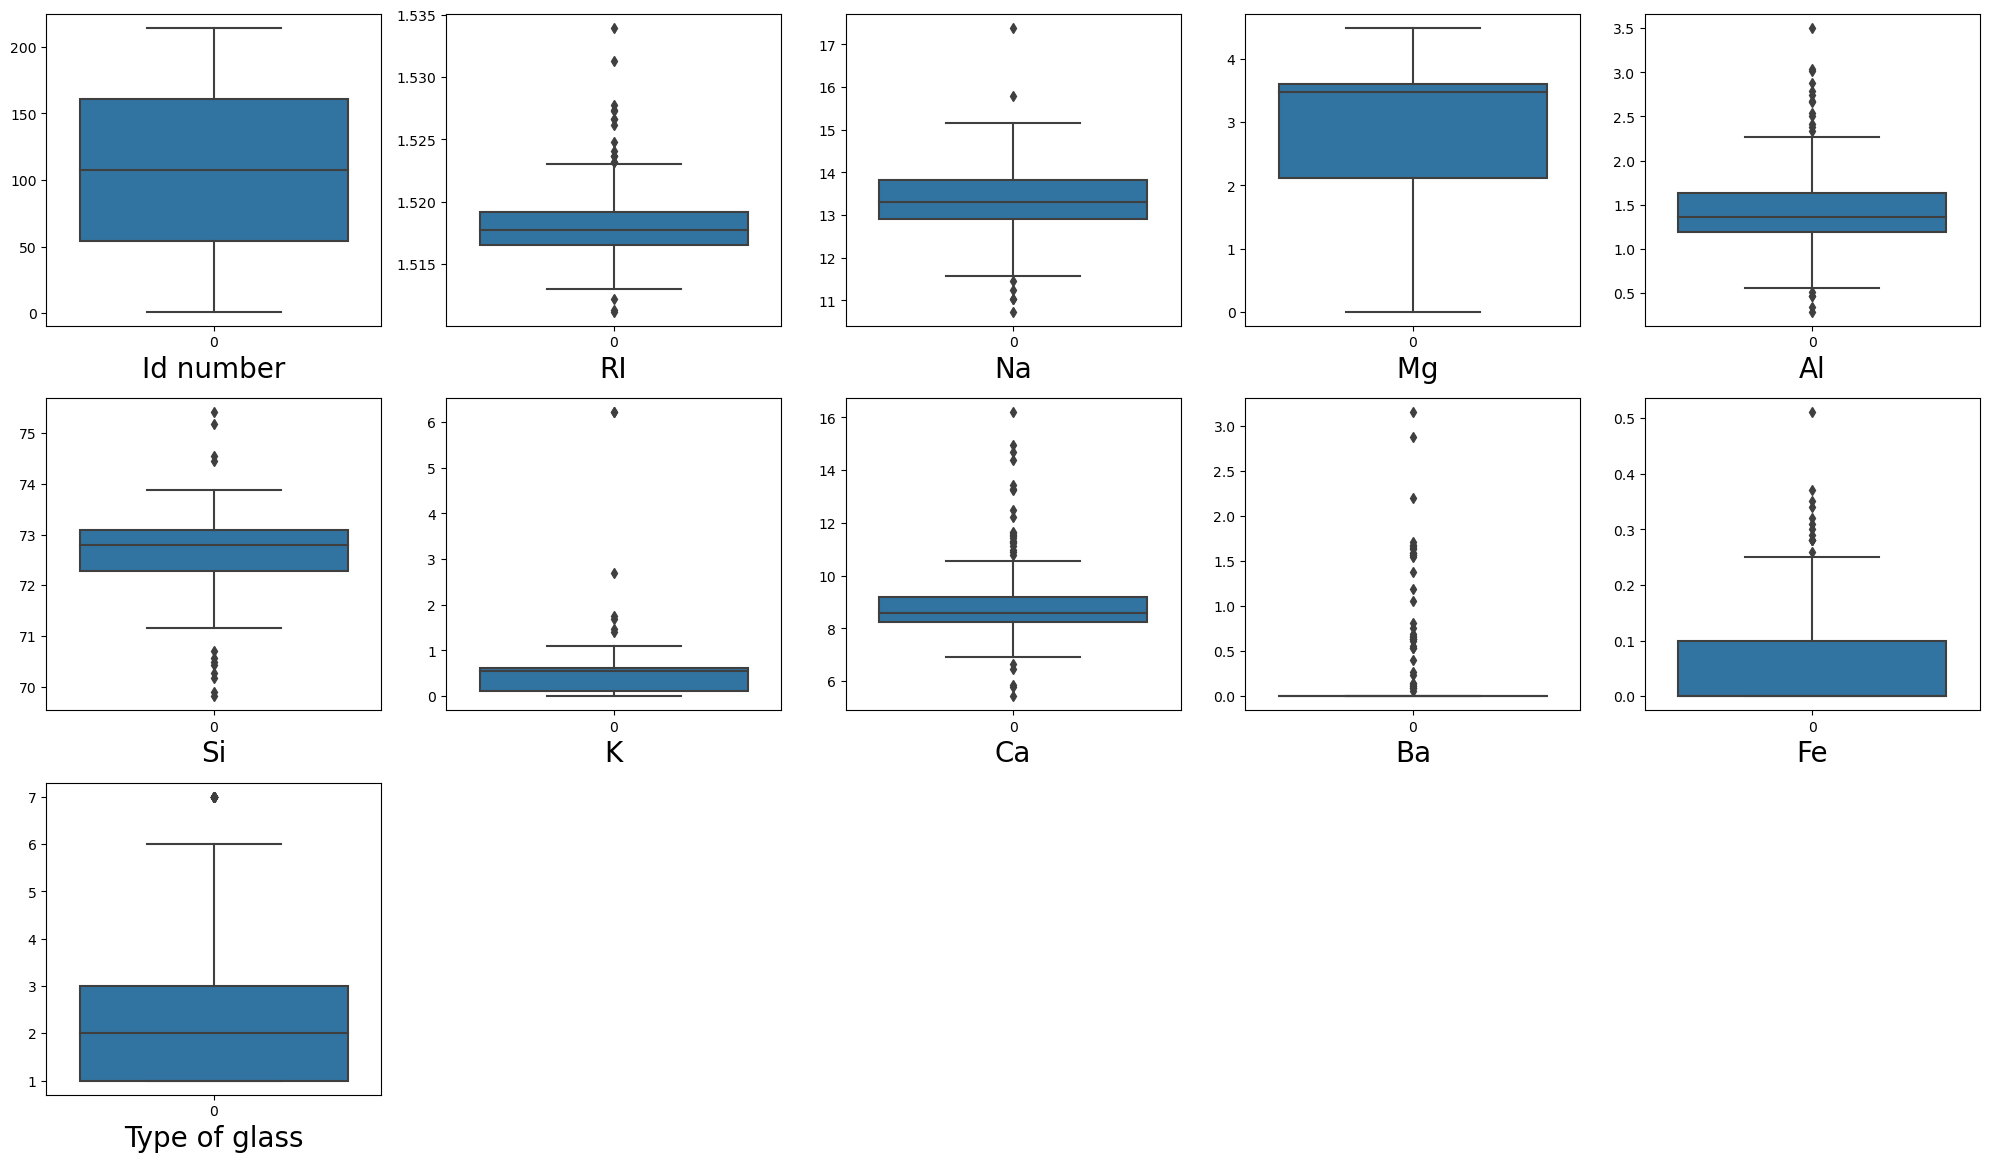

In [27]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1

for column in df:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plot_number+=1
        
        
    
        
plt.tight_layout()

In [28]:
zscore=np.abs(zscore(df))

In [29]:
print(np.where (zscore>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [30]:
df=df[(zscore<3).all(axis=1)]

In [31]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [32]:
df.shape

(194, 11)

In [33]:
df=df.drop("Id number",axis=1)

In [34]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [35]:
Y=df["Type of glass"]

In [36]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 194, dtype: int64

In [37]:
Y.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type of glass, dtype: int64

In [38]:
X=df.drop("Type of glass",axis=1)

In [39]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(Y.shape,Y_train.shape,Y_test.shape)

(194,) (155,) (39,)


In [42]:
smt=SMOTE()
X_train,Y_train=smt.fit_resample(X,Y)

In [43]:
Y_train.value_counts()

1    70
2    70
3    70
5    70
6    70
7    70
Name: Type of glass, dtype: int64

In [44]:
lin_reg_model=LinearRegression()

In [45]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [46]:
training_data_prediction=lin_reg_model.predict(X_train)

In [47]:
error_score=metrics.r2_score(Y_train,training_data_prediction)

In [48]:
print("R2square_error",error_score)

R2square_error 0.7434393412064365


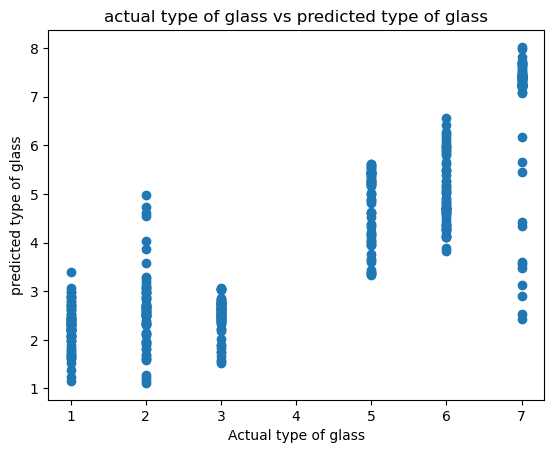

In [49]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual type of glass")
plt.ylabel("predicted type of glass")
plt.title("actual type of glass vs predicted type of glass")
plt.show()

In [50]:
test_data_prediction=lin_reg_model.predict(X_test)

In [51]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [52]:
print("R2SCORE",error_score)

R2SCORE 0.4229485893803908


In [53]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [54]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [72]:
predrf=rf.predict(X_test)
rn_acc=accuracy_score(Y_test,predrf)

In [56]:
print(accuracy_score(Y_test,predrf))

1.0


In [57]:
print(confusion_matrix(Y_test,predrf))

[[19  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  2]]


In [58]:
print(classification_report(Y_test,predrf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [59]:
ad=AdaBoostClassifier(n_estimators=100,algorithm="SAMME.R")

In [69]:
ad.fit(X_train,Y_train)
ad_pred=ad.predict(X_test)
ad_acc=accuracy_score(Y_test,ad_pred)
print(accuracy_score(Y_test,ad_pred))
print(confusion_matrix(Y_test,ad_pred))
print(classification_report(Y_test,ad_pred))

0.3333333333333333
[[ 3 13  3  0  0  0]
 [ 2  5  3  1  1  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  0  0]
 [ 0  2  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.60      0.16      0.25        19
           2       0.24      0.42      0.30        12
           3       0.25      1.00      0.40         2
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.33        39
   macro avg       0.31      0.43      0.30        39
weighted avg       0.44      0.33      0.30        39



In [61]:
svc=SVC()
ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm="SAMME")
ad.fit(X_train,Y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(Y_test,ad_pred))
print(confusion_matrix(Y_test,ad_pred))
print(classification_report(Y_test,ad_pred))


0.3333333333333333
[[ 3 13  3  0  0  0]
 [ 2  5  3  1  1  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  0  0]
 [ 0  2  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.60      0.16      0.25        19
           2       0.24      0.42      0.30        12
           3       0.25      1.00      0.40         2
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.33        39
   macro avg       0.31      0.43      0.30        39
weighted avg       0.44      0.33      0.30        39



In [71]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
gb_pred=gb.predict(X_test)
gb_acc=accuracy_score(Y_test,gb_pred)
print(accuracy_score(Y_test,gb_pred))
print(confusion_matrix(Y_test,gb_pred))
print(classification_report(Y_test,gb_pred))

1.0
[[19  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [70]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,Y_train)
knc_pred=knc.predict(X_test)
knc_acc=accuracy_score(Y_test,knc_pred)
print(accuracy_score(Y_test,knc_pred))
print(confusion_matrix(Y_test,knc_pred))
print(classification_report(Y_test,knc_pred))

0.717948717948718
[[12  2  5  0  0  0]
 [ 1  9  0  1  1  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  1]]
              precision    recall  f1-score   support

           1       0.92      0.63      0.75        19
           2       0.82      0.75      0.78        12
           3       0.29      1.00      0.44         2
           5       0.75      1.00      0.86         3
           6       0.33      1.00      0.50         1
           7       1.00      0.50      0.67         2

    accuracy                           0.72        39
   macro avg       0.69      0.81      0.67        39
weighted avg       0.83      0.72      0.74        39



In [75]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, Y_train)
y_pred = DecTree.predict(X_test)
dec_acc = metrics.accuracy_score(y_pred,Y_test)
print(accuracy_score(y_pred,Y_test))
print(confusion_matrix(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

1.0
[[19  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [76]:
estimator=[]
estimator.append(("LR",KNeighborsClassifier()))
estimator.append(("SVC",SVC(gamma="auto",probability=True)))
estimator.append(("DTC",DecisionTreeClassifier()))

In [77]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [78]:
vot_hard=VotingClassifier(estimators=estimator,voting="hard")
vot_hard.fit(X_train,Y_train)
vot_hard_pred=knc.predict(X_test)
score=accuracy_score(Y_test,vot_hard_pred)
print(score)
print(confusion_matrix(Y_test,vot_hard_pred))
print(classification_report(Y_test,vot_hard_pred))
print(vot_hard_pred)
print("Hard voting Score % d " % score)


0.717948717948718
[[12  2  5  0  0  0]
 [ 1  9  0  1  1  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  1]]
              precision    recall  f1-score   support

           1       0.92      0.63      0.75        19
           2       0.82      0.75      0.78        12
           3       0.29      1.00      0.44         2
           5       0.75      1.00      0.86         3
           6       0.33      1.00      0.50         1
           7       1.00      0.50      0.67         2

    accuracy                           0.72        39
   macro avg       0.69      0.81      0.67        39
weighted avg       0.83      0.72      0.74        39

[1 2 3 1 1 2 2 3 2 5 6 1 2 1 5 3 1 1 1 3 1 2 3 2 7 1 1 1 2 1 6 2 2 3 6 3 5
 5 2]
Hard voting Score  0 


In [79]:
vot_soft=VotingClassifier(estimators=estimator,voting="soft")
vot_soft.fit(X_train,Y_train)
vot_soft_pred=knc.predict(X_test)
score=accuracy_score(Y_test,vot_soft_pred)
print(score)
print(confusion_matrix(Y_test,vot_soft_pred))
print(classification_report(Y_test,vot_soft_pred))
print(vot_soft_pred)
print("Soft voting Score % d " % score)

0.717948717948718
[[12  2  5  0  0  0]
 [ 1  9  0  1  1  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  1]]
              precision    recall  f1-score   support

           1       0.92      0.63      0.75        19
           2       0.82      0.75      0.78        12
           3       0.29      1.00      0.44         2
           5       0.75      1.00      0.86         3
           6       0.33      1.00      0.50         1
           7       1.00      0.50      0.67         2

    accuracy                           0.72        39
   macro avg       0.69      0.81      0.67        39
weighted avg       0.83      0.72      0.74        39

[1 2 3 1 1 2 2 3 2 5 6 1 2 1 5 3 1 1 1 3 1 2 3 2 7 1 1 1 2 1 6 2 2 3 6 3 5
 5 2]
Soft voting Score  0 


In [80]:
pd.DataFrame([['AdaBoost',ad_acc],['KNeighborsClassifier',knc_acc],['GradientBoostingClassifier',gb_acc],
                             ['Decision Tree',dec_acc],['Random Forest',rn_acc]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,AdaBoost,0.333333
1,KNeighborsClassifier,0.717949
2,GradientBoostingClassifier,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000


In [96]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

ValueError: Invalid parameter 'C' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [89]:
model = grid.best_estimator_
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,Y_test)

1.0

In [ ]:
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))